In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

Importing data

In [ ]:
data_train = pd.read_csv('train.csv')

<ipython-input-3-00e42677f732>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('train.csv')


In [93]:
data_train.shape

(100000, 28)

Reviewing data. first 10 items. cleaning is needed

In [ ]:
data_train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>, <Axes: >]],
      dtype=object)

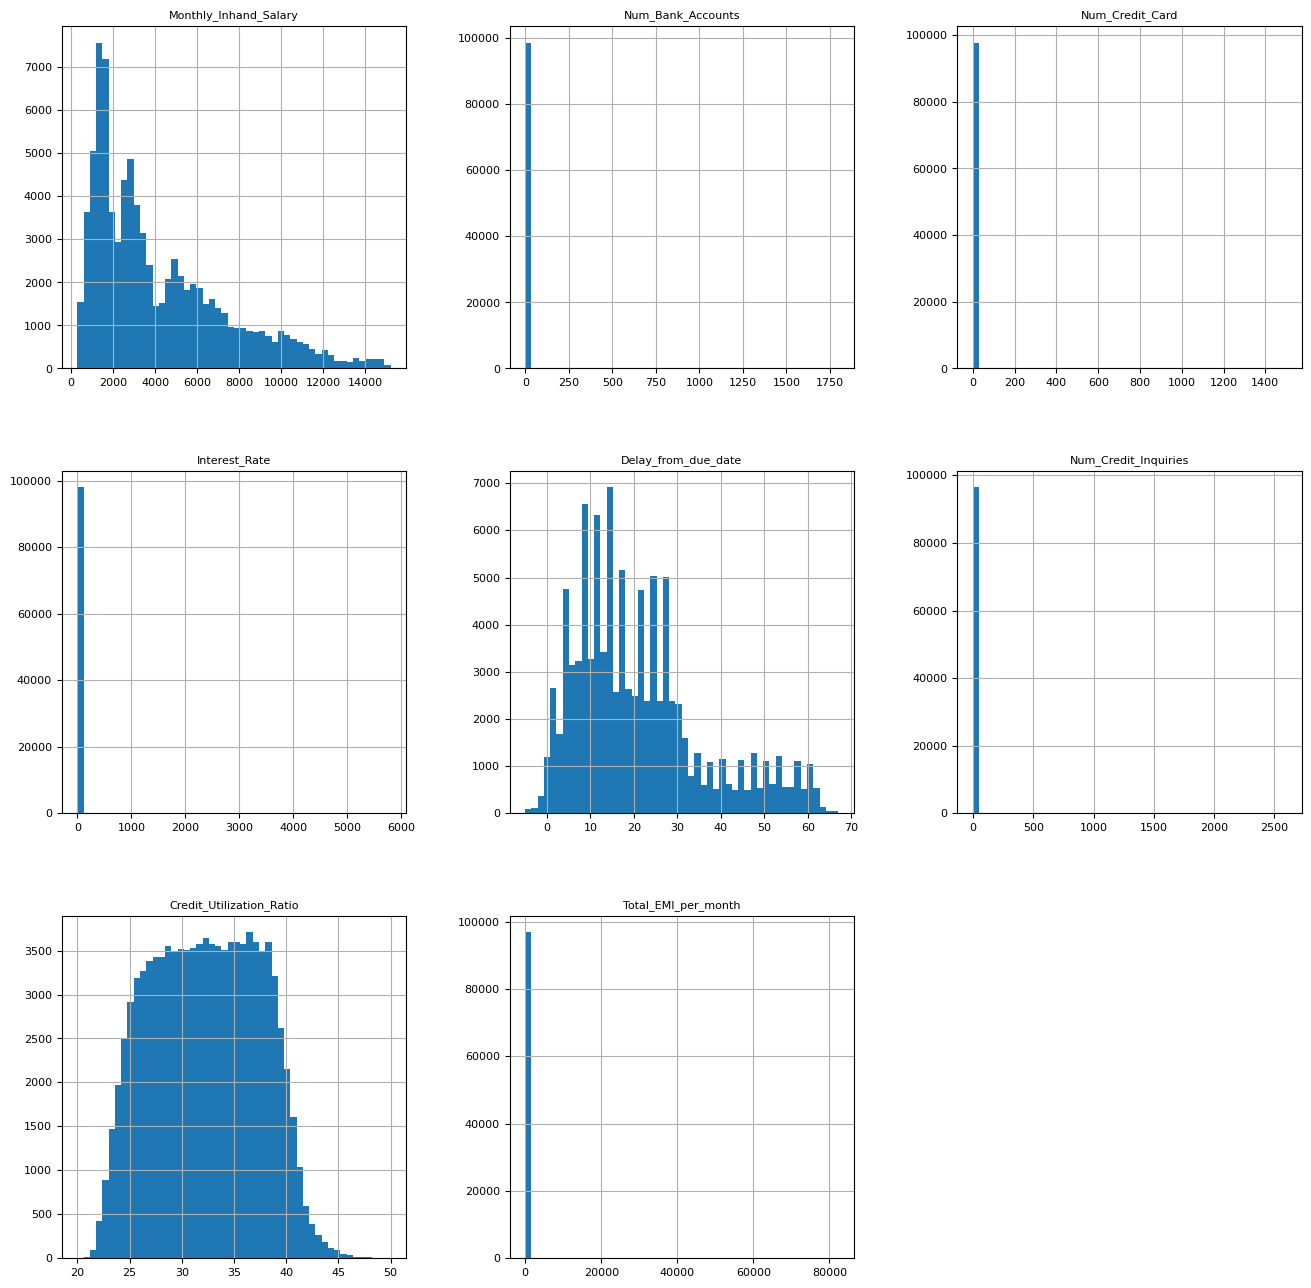

In [ ]:
data_train.hist(bins=50, figsize=(16, 16))

Several columns contains missing values. The focus will be only on the important to the models- ignoring Name, ID, Customer_ID and SSN.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Making a data copy

In [ ]:
df = data_train.copy()

Removing the "_" and similar inconsistent data based on what was found at first check of raw data + changing the types

In [ ]:
df["Age"] = df["Age"].str.replace("_", "")
df["Age"] = df["Age"].astype(int)
df["Occupation"] = df["Occupation"].replace("_______", np.nan)
df["Annual_Income"] = df["Annual_Income"].str.replace("_", "")
df["Annual_Income"] = df["Annual_Income"].astype(float)
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_", "")
df["Num_of_Loan"] = df["Num_of_Loan"].astype(int)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_", "")
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)
df["Monthly_Balance"] = df["Monthly_Balance"].str.replace("_", "")
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", np.nan)
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].str.replace("_", "")
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM", "No")
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_", "")
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df["Credit_Mix"] = df["Credit_Mix"].replace("_", np.nan)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].replace("_", np.nan)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

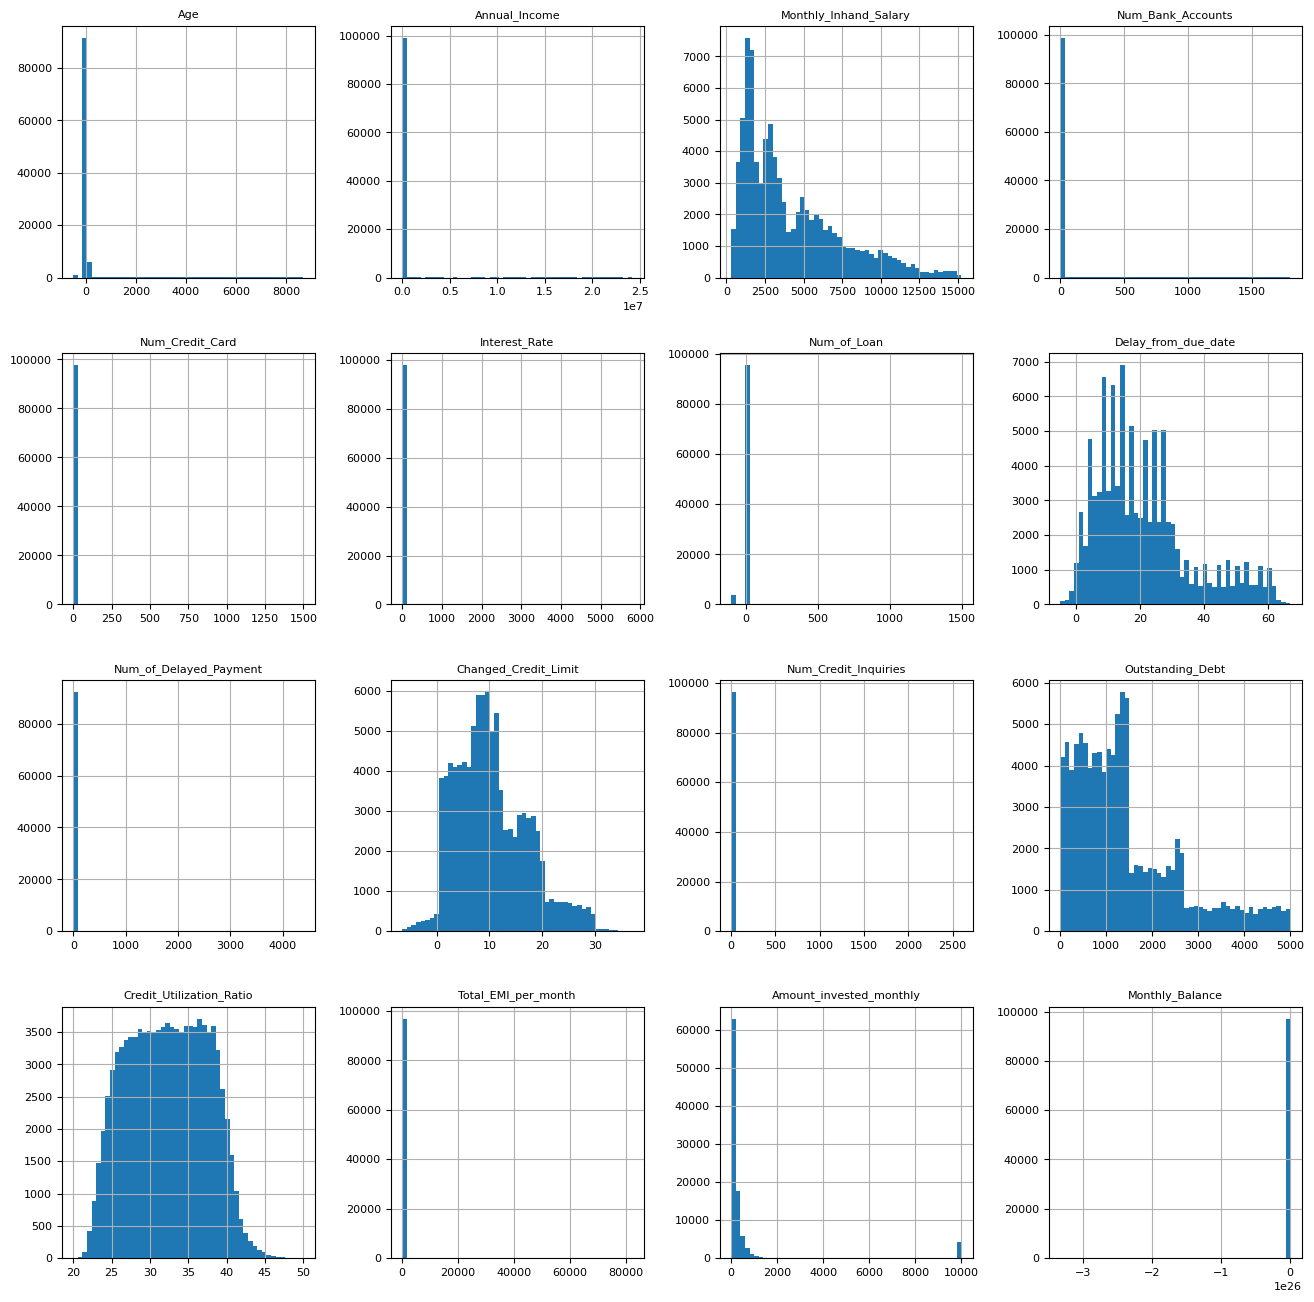

In [ ]:
df.hist(bins=50, figsize=(16, 16))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

Transform the Credit_History_Age into the number

In [ ]:
def convert_credit_history_age(age_str):
    years = 0
    months = 0
    if pd.notnull(age_str):
        years_match = re.search(r'(\d+)\s+Years', age_str)
        months_match = re.search(r'(\d+)\s+Months', age_str)
        if years_match:
            years = int(years_match.group(1))
        if months_match:
            months = int(months_match.group(1))
    return years + (months / 12)
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_age)

Replacing values which are <0
Only for several columns based on Customer_Id
and for Monthly_Balance separately since it is not repeating

In [ ]:
def correct_column_by_name(df, column_name):
    most_frequent_value = (
        df[df[column_name].notnull()]
        .groupby('Customer_ID')[column_name]
        .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        .to_dict()
    )

    def replace_value(row):
        value = row[column_name]
        if pd.isnull(value) or (isinstance(value, (int, float)) and (value <= 0)):
            return most_frequent_value.get(row['Customer_ID'], np.nan)
        return value
    df[column_name] = df.apply(replace_value, axis=1)
    return df

columns_to_correct = [
    'Age', 'Occupation','Credit_Mix', 'Annual_Income',
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Num_of_Loan','Monthly_Balance'
]

for column in columns_to_correct:
    df = correct_column_by_name(df, column)


In [ ]:
df = df[df['Monthly_Balance'] >= 0]

In [ ]:
df = df[df['Num_of_Delayed_Payment'] >= 0]

Checking the example of the missing value in Monthly_Inhand_Salary column

In [ ]:
df[df['Customer_ID'] == 'CUS_0x16ee']['Monthly_Inhand_Salary']

,Monthly_Inhand_Salary
97152,9851.01
97153,9851.01
97154,9851.01
97155,9851.01
97156,9851.01
97157,9851.01
97158,9851.01
97159,9851.01


reviewing the number of the unique values in columns. Highest values contains credit_mix, but its NaN values. Columns such as ID, Cusomter_ID, Name, SSN will be dropped as they do not contain relevant info.

In [ ]:
var_df = pd.DataFrame(columns = ['Columns','NaN','NaN%'])

for i, val in enumerate(df.columns):
    var_df.loc[i] = [val, df[val].isna().sum(), str(round((df[val].isna().sum()/ df.shape[0])*100,2)) + '%']
var_df

,Columns,NaN,NaN%
0,ID,0,0.0%
1,Customer_ID,0,0.0%
2,Month,0,0.0%
3,Name,9066,9.98%
4,Age,0,0.0%
5,SSN,0,0.0%
6,Occupation,0,0.0%
7,Annual_Income,0,0.0%
8,Monthly_Inhand_Salary,0,0.0%
9,Num_Bank_Accounts,0,0.0%


In [ ]:
df.describe(include=['int', 'float']).T.applymap('{:.2f}'.format)

<ipython-input-17-a59ba1182625>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe(include=['int', 'float']).T.applymap('{:.2f}'.format)


,count,mean,std,min,25%,50%,75%,max
Age,90809.00,115.55,683.51,14.00,25.00,33.00,42.00,8698.00
Annual_Income,90809.00,174880.84,1426222.35,7005.93,19418.47,37421.88,72524.20,24198062.00
Monthly_Inhand_Salary,90809.00,4184.72,3181.15,303.65,1623.13,3080.56,5938.74,15204.63
Num_Bank_Accounts,90809.00,17.05,117.15,-1.00,4.00,6.00,7.00,1798.00
Num_Credit_Card,90809.00,22.47,129.08,0.00,4.00,6.00,7.00,1499.00
Interest_Rate,90809.00,73.20,469.31,1.00,8.00,14.00,20.00,5797.00
Num_of_Loan,90809.00,6.99,58.83,0.00,2.00,3.00,5.00,1496.00
Delay_from_due_date,90809.00,21.15,14.88,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,90809.00,31.14,226.76,0.00,9.00,14.00,18.00,4397.00
Changed_Credit_Limit,88904.00,10.41,6.80,-6.49,5.34,9.42,14.94,36.97


Although types of credits are important in more detailed scoring to identify secure and unsecure loans, the currect task won't include such level of details. Column type_of_loan will be dropped.

In [ ]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,22.500000,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,0.000000,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26.583333,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26.666667,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,39.182656,26.833333,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26.916667,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good


There are extreme values in Age column. The max value is 8698. Such values should be capped using upper bound since the negative values are already removed.

In [ ]:
df['Age'].max()

8698

In [ ]:

def correct_column_by_name(df, column_name, upper_bound):
    most_frequent_value = (
        df[df[column_name].notnull()]  # Exclude missing values
        .groupby('Customer_ID')[column_name]
        .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        .to_dict()
    )

    def replace_value(row):
        if row[column_name] > upper_bound:
            return most_frequent_value.get(row['Customer_ID'], np.nan)
        return row[column_name]

    df[column_name] = df.apply(replace_value, axis=1)
    return df

columns_to_correct = [
    'Age', 'Annual_Income','Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Monthly_Balance','Interest_Rate', 'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries','Total_EMI_per_month'
]

for column in columns_to_correct:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR


    print(f'Upper bound for {column}:', upper_bound)


    df = correct_column_by_name(df, column, upper_bound)

Upper bound for Age: 67.5
Upper bound for Annual_Income: 152182.78749999998
Upper bound for Monthly_Inhand_Salary: 12412.162083333333
Upper bound for Num_Bank_Accounts: 11.5
Upper bound for Num_Credit_Card: 11.5
Upper bound for Num_of_Loan: 9.5
Upper bound for Monthly_Balance: 764.9078278576607
Upper bound for Interest_Rate: 38.0
Upper bound for Num_of_Delayed_Payment: 31.5
Upper bound for Num_Credit_Inquiries: 18.0
Upper bound for Total_EMI_per_month: 357.1747017212971


Those are mulitple outliers. Deleting all above the upper bound will result in losing a lot of records since the upper bound is only 483. Deleting exactly this outlier results in better distribution.

In [ ]:
Q1 = df['Amount_invested_monthly'].quantile(0.25)
Q3 = df['Amount_invested_monthly'].quantile(0.75)
print('Q1:', Q1, 'Q3:', Q3)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print('Upper bound:', upper_bound)

Q1: 74.25386944089105 Q3: 265.3903654355866
Upper bound: 552.09510942763


In [ ]:
df['Amount_invested_monthly'].max()

10000.0

In [ ]:
df = df[df['Amount_invested_monthly'] != 10000]

Since monthly balance cannot be negative and it is not constant, but is different each application -> all containing 0 will be deleted. Monthly_Balance is aprox 1.7% of the data

In [ ]:
columns_to_check = ['Credit_Mix', 'Monthly_Balance', 'Payment_Behaviour']

df = df.dropna(subset=columns_to_check)


In [ ]:
var_df = pd.DataFrame(columns = ['Columns','NaN','NaN%'])

for i, val in enumerate(df.columns):
    var_df.loc[i] = [val, df[val].isna().sum(), str(round((df[val].isna().sum()/ df.shape[0])*100,2)) + '%']
var_df

,Columns,NaN,NaN%
0,ID,0,0.0%
1,Customer_ID,0,0.0%
2,Month,0,0.0%
3,Name,8017,9.98%
4,Age,0,0.0%
5,SSN,0,0.0%
6,Occupation,0,0.0%
7,Annual_Income,0,0.0%
8,Monthly_Inhand_Salary,0,0.0%
9,Num_Bank_Accounts,0,0.0%


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

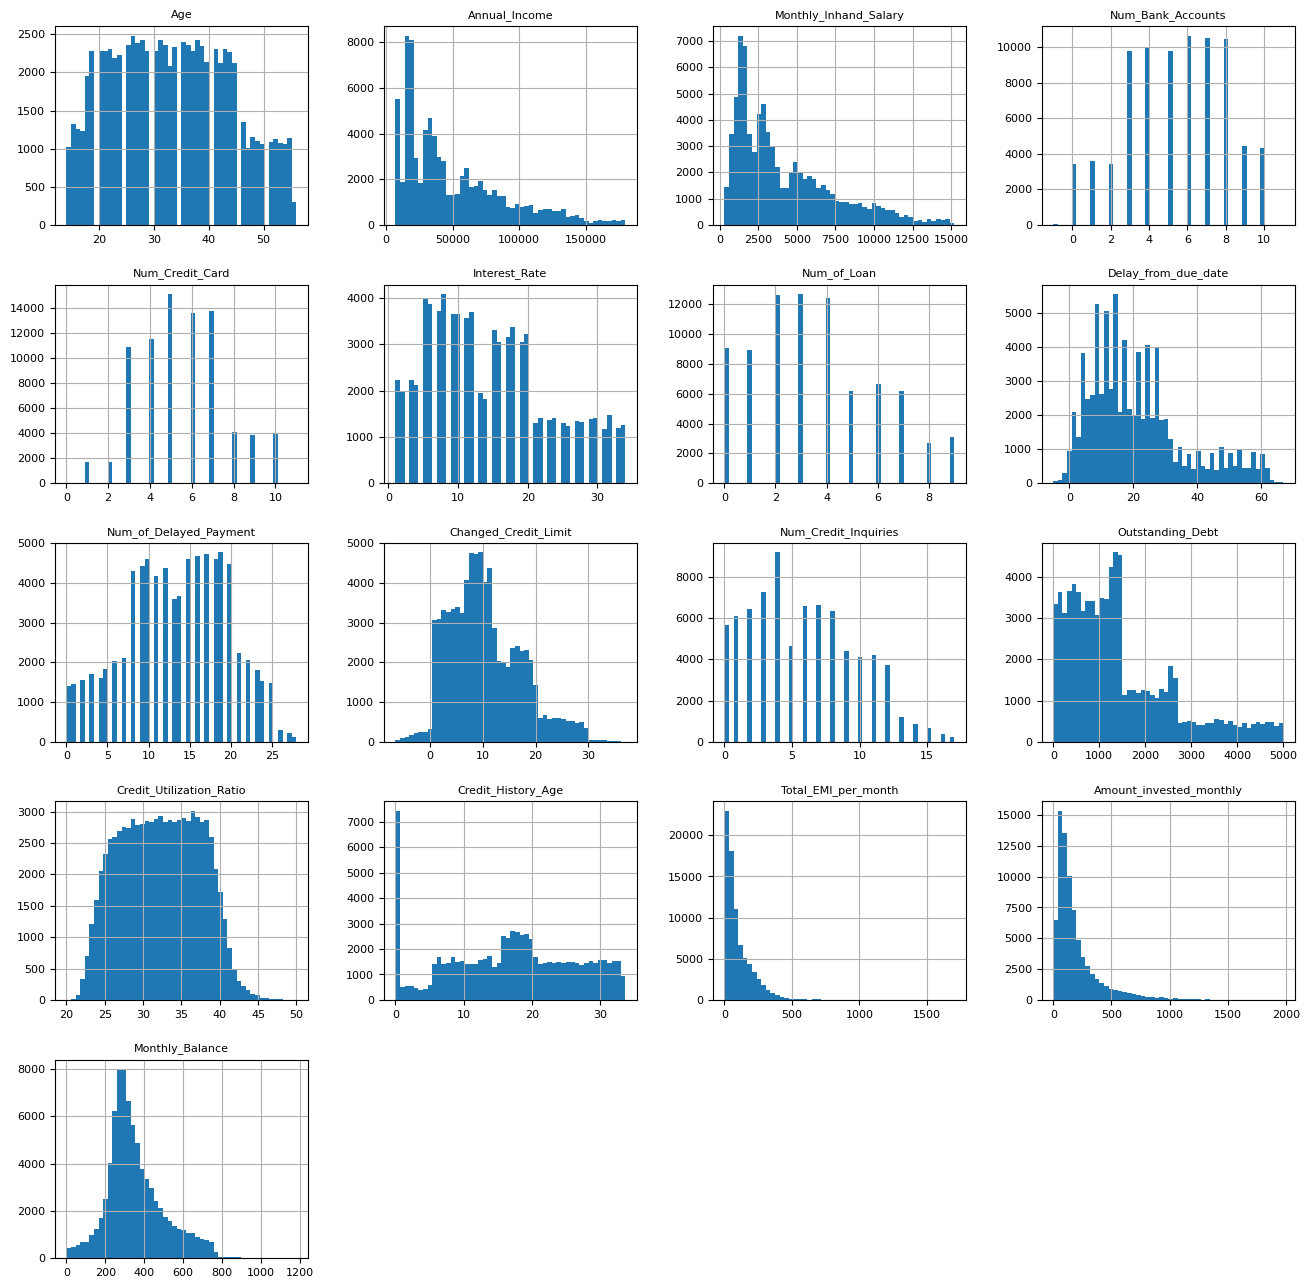

In [ ]:
df.hist(bins=50, figsize=(16, 16))

based on the graph the minimum age is not 18 but slightly lower. Such records should be deleted from the dataset

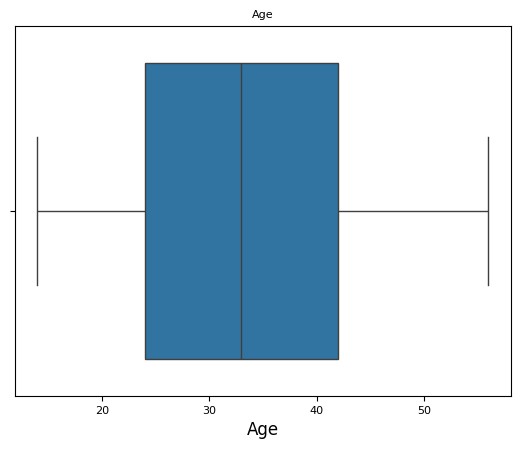

In [ ]:
sns.boxplot(x = df['Age']);
plt.title("Age");

In [ ]:
df['Age'].min()

14

In [ ]:
df = df[df['Age'] >= 18]

total nr of items left are 75521

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75521 entries, 0 to 98302
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        75521 non-null  object 
 1   Customer_ID               75521 non-null  object 
 2   Month                     75521 non-null  object 
 3   Name                      67969 non-null  object 
 4   Age                       75521 non-null  int64  
 5   SSN                       75521 non-null  object 
 6   Occupation                75521 non-null  object 
 7   Annual_Income             75521 non-null  float64
 8   Monthly_Inhand_Salary     75521 non-null  float64
 9   Num_Bank_Accounts         75521 non-null  int64  
 10  Num_Credit_Card           75521 non-null  int64  
 11  Interest_Rate             75521 non-null  int64  
 12  Num_of_Loan               75521 non-null  int64  
 13  Type_of_Loan              66576 non-null  object 
 14  Delay_from_

In [ ]:
df.describe(include=['int', 'float']).T.applymap('{:.2f}'.format)

<ipython-input-31-a59ba1182625>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe(include=['int', 'float']).T.applymap('{:.2f}'.format)


,count,mean,std,min,25%,50%,75%,max
Age,75521.00,34.40,10.11,18.00,26.00,34.00,42.00,56.00
Annual_Income,75521.00,51099.79,38715.85,7006.03,19532.06,37424.09,72629.12,179987.28
Monthly_Inhand_Salary,75521.00,4248.15,3221.84,303.65,1638.60,3121.09,6050.20,15204.63
Num_Bank_Accounts,75521.00,5.30,2.60,-1.00,3.00,5.00,7.00,11.00
Num_Credit_Card,75521.00,5.49,2.05,0.00,4.00,5.00,7.00,11.00
Interest_Rate,75521.00,14.24,8.69,1.00,7.00,12.00,20.00,34.00
Num_of_Loan,75521.00,3.45,2.43,0.00,2.00,3.00,5.00,9.00
Delay_from_due_date,75521.00,20.65,14.71,-5.00,10.00,17.00,28.00,67.00
Num_of_Delayed_Payment,75521.00,13.21,6.22,0.00,9.00,13.00,18.00,28.00
Changed_Credit_Limit,73936.00,10.24,6.76,-6.49,5.15,9.25,14.54,36.97


Data analysis

Distribution of data by the credit score

In [ ]:
df = df.drop(columns=["ID", "Customer_ID","Month", "Name", "SSN", "Type_of_Loan"])

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69114 entries, 0 to 98302
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       69114 non-null  int64  
 1   Occupation                69114 non-null  object 
 2   Annual_Income             69114 non-null  float64
 3   Monthly_Inhand_Salary     69114 non-null  float64
 4   Num_Bank_Accounts         69114 non-null  int64  
 5   Num_Credit_Card           69114 non-null  int64  
 6   Interest_Rate             69114 non-null  int64  
 7   Num_of_Loan               69114 non-null  int64  
 8   Delay_from_due_date       69114 non-null  int64  
 9   Num_of_Delayed_Payment    69114 non-null  float64
 10  Changed_Credit_Limit      69114 non-null  float64
 11  Num_Credit_Inquiries      69114 non-null  float64
 12  Credit_Mix                69114 non-null  object 
 13  Outstanding_Debt          69114 non-null  float64
 14  Credit_Util

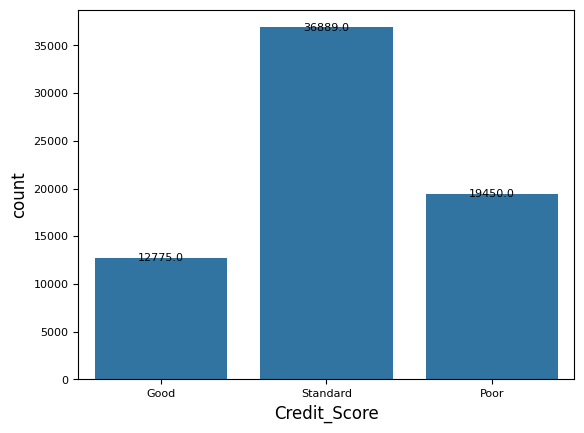

In [ ]:
plt.figure
ax = sns.countplot(x=df['Credit_Score'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center')
plt.show()


Data needs additional analysis and outlier investigation

In [ ]:
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8.0,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23,Scientist,19114.12,1824.843333,3,4,3,4,3,6.0,...,Good,809.98,23.933795,0.000000,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,28,Teacher,34847.84,3037.986667,2,4,6,1,3,4.0,...,Good,605.03,24.464031,26.583333,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98297,38,Lawyer,41015.55,3152.962500,0,4,4,1,4,3.0,...,Good,599.40,38.442034,0.000000,No,25.671257,218.360354,High_spent_Small_value_payments,331.264639,Standard
98299,38,Lawyer,41015.55,3152.962500,0,4,4,1,9,1.0,...,Good,599.40,31.936092,25.166667,No,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,Standard
98300,38,Lawyer,41015.55,3152.962500,0,4,4,1,9,1.0,...,Good,599.40,26.268474,25.250000,No,25.671257,76.057218,High_spent_Large_value_payments,453.567775,Standard
98301,38,Lawyer,41015.55,3152.962500,0,4,4,1,9,1.0,...,Good,599.40,28.754729,0.000000,No,25.671257,91.198586,High_spent_Medium_value_payments,448.426407,Standard


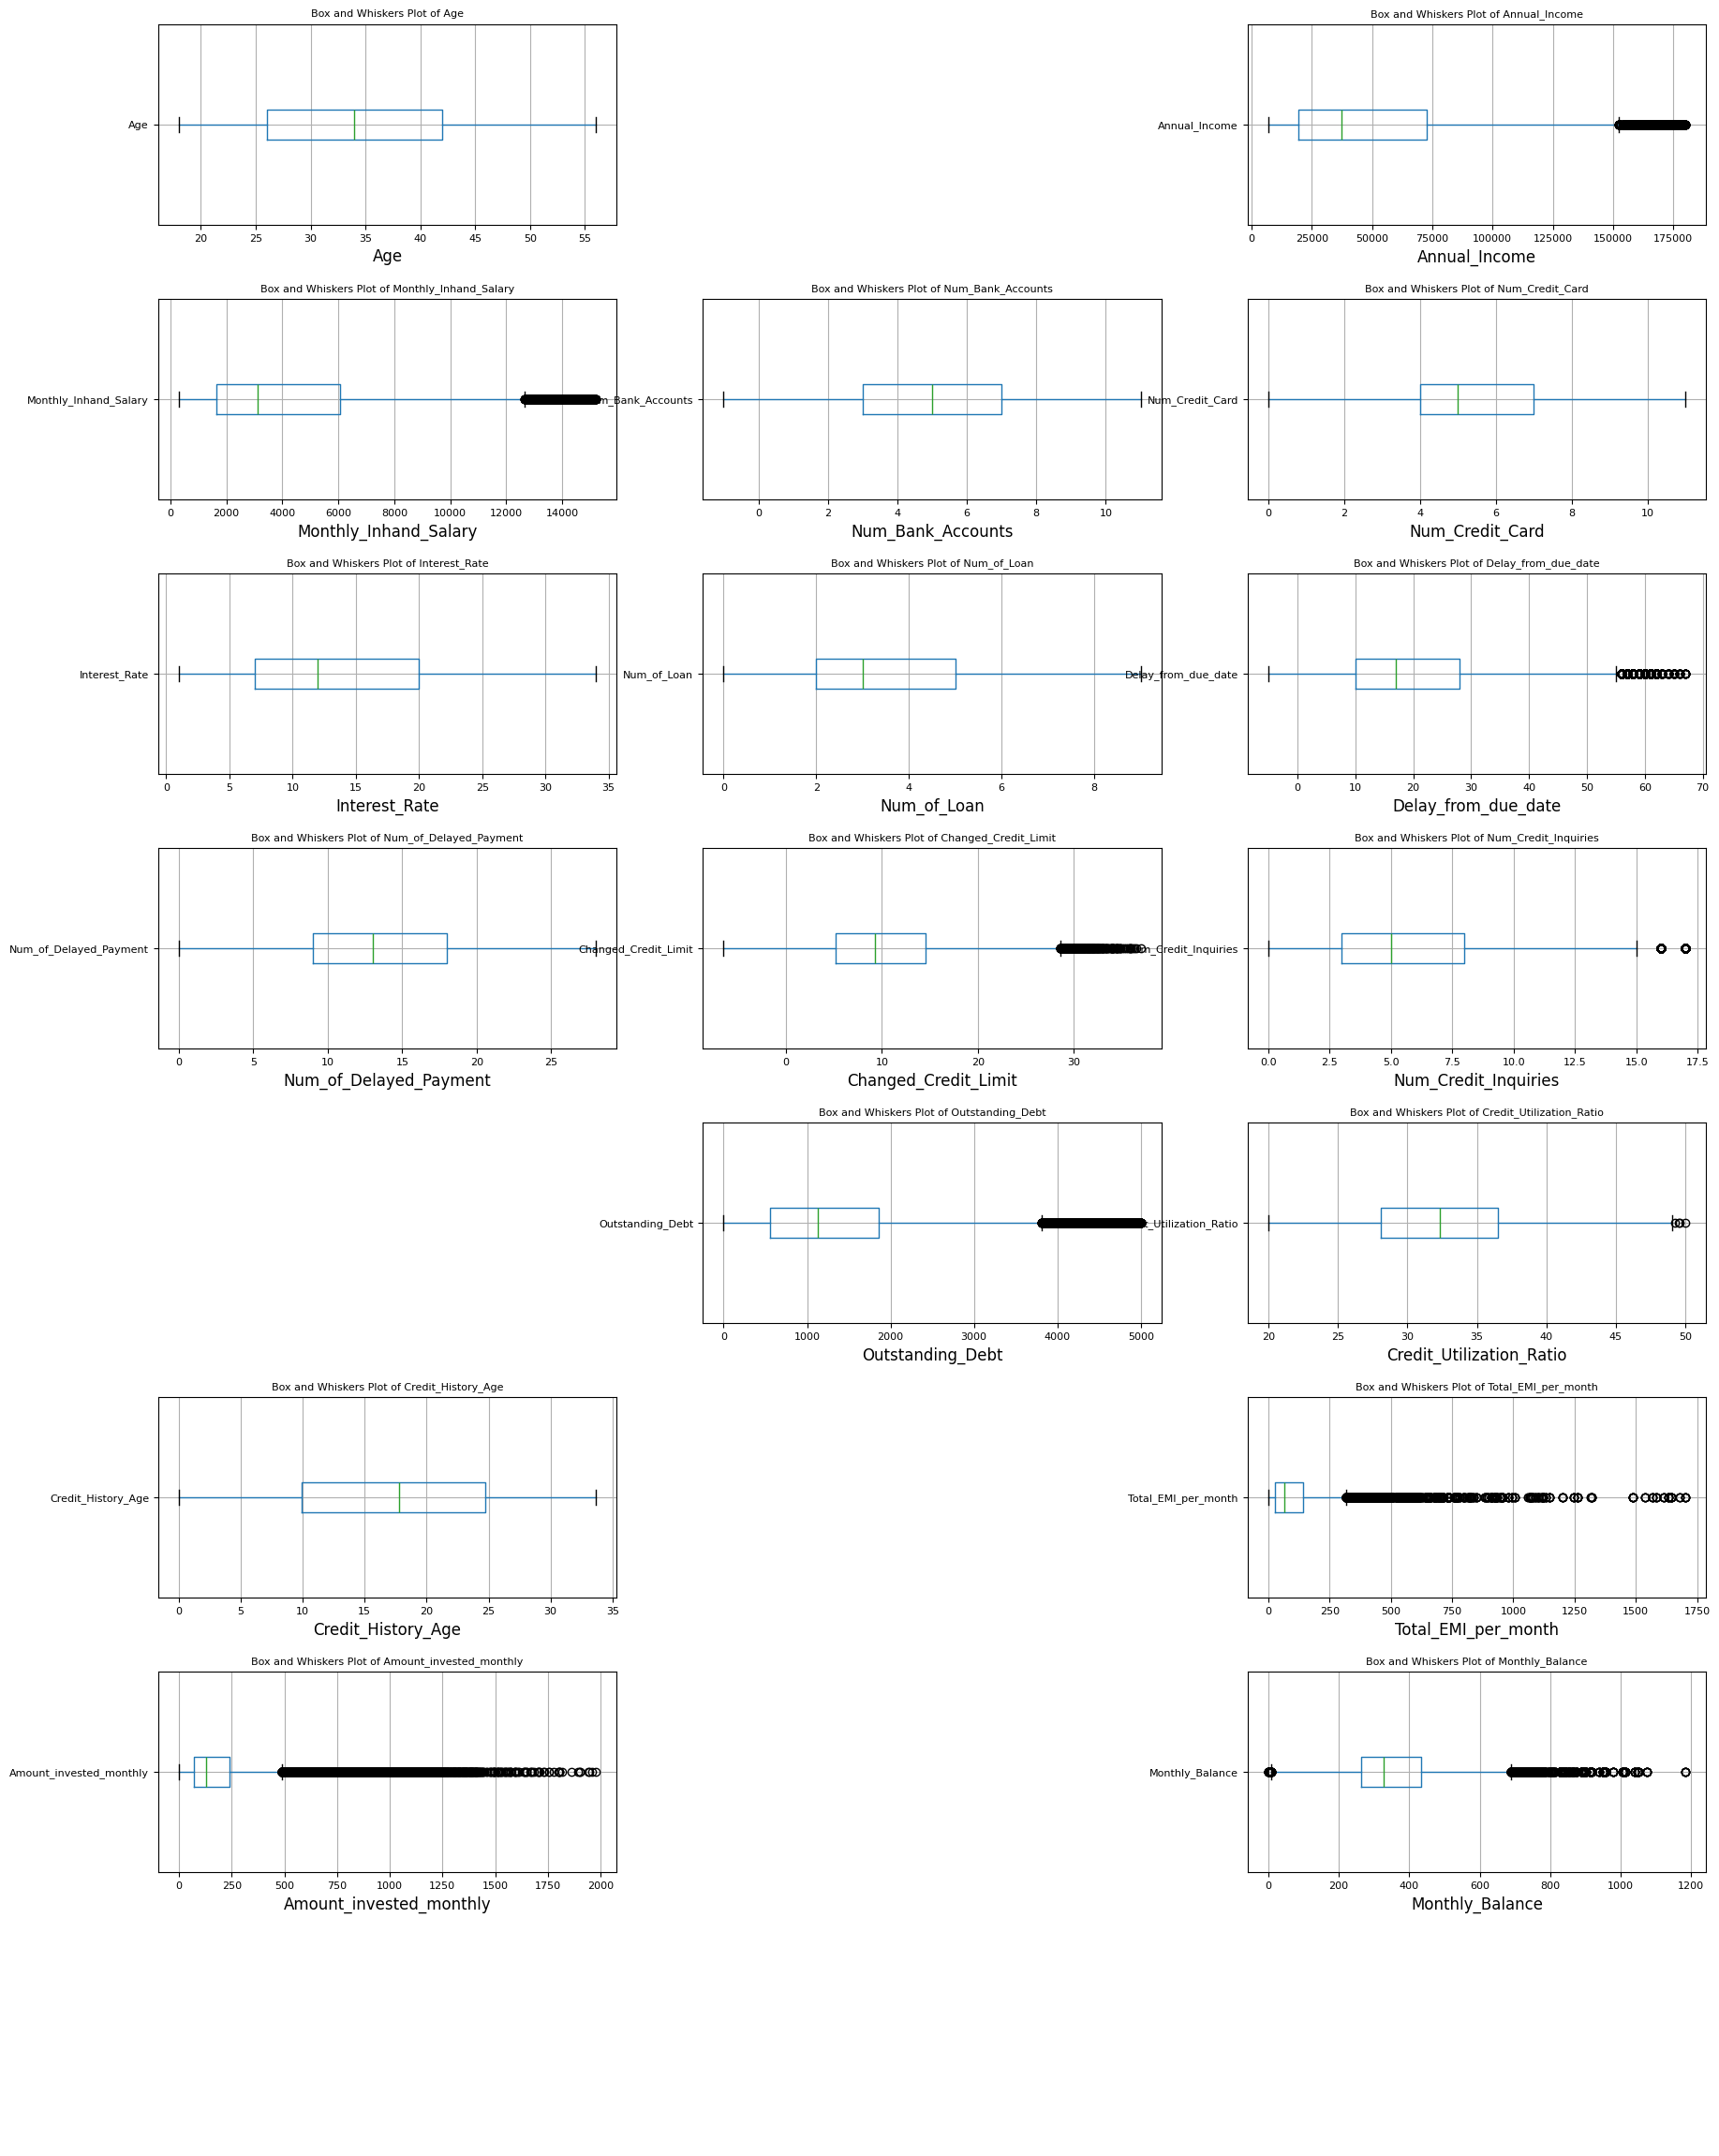

In [ ]:
import matplotlib.pyplot as plt


n_cols = 3
n_rows = (len(df.columns) + n_cols - 1) // n_cols
columns = df.columns


fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 24))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    if df[column].dtype in ['float64', 'int64']:

        df.boxplot(column=column, ax=ax, vert=False)
        ax.set_title(f'Box and Whiskers Plot of {column}')
    elif df[column].dtype == 'object':
        ax.axis('off')
    ax.set_xlabel(column)

for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.show()

splitting data into categ. and num

In [ ]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(include="object").columns

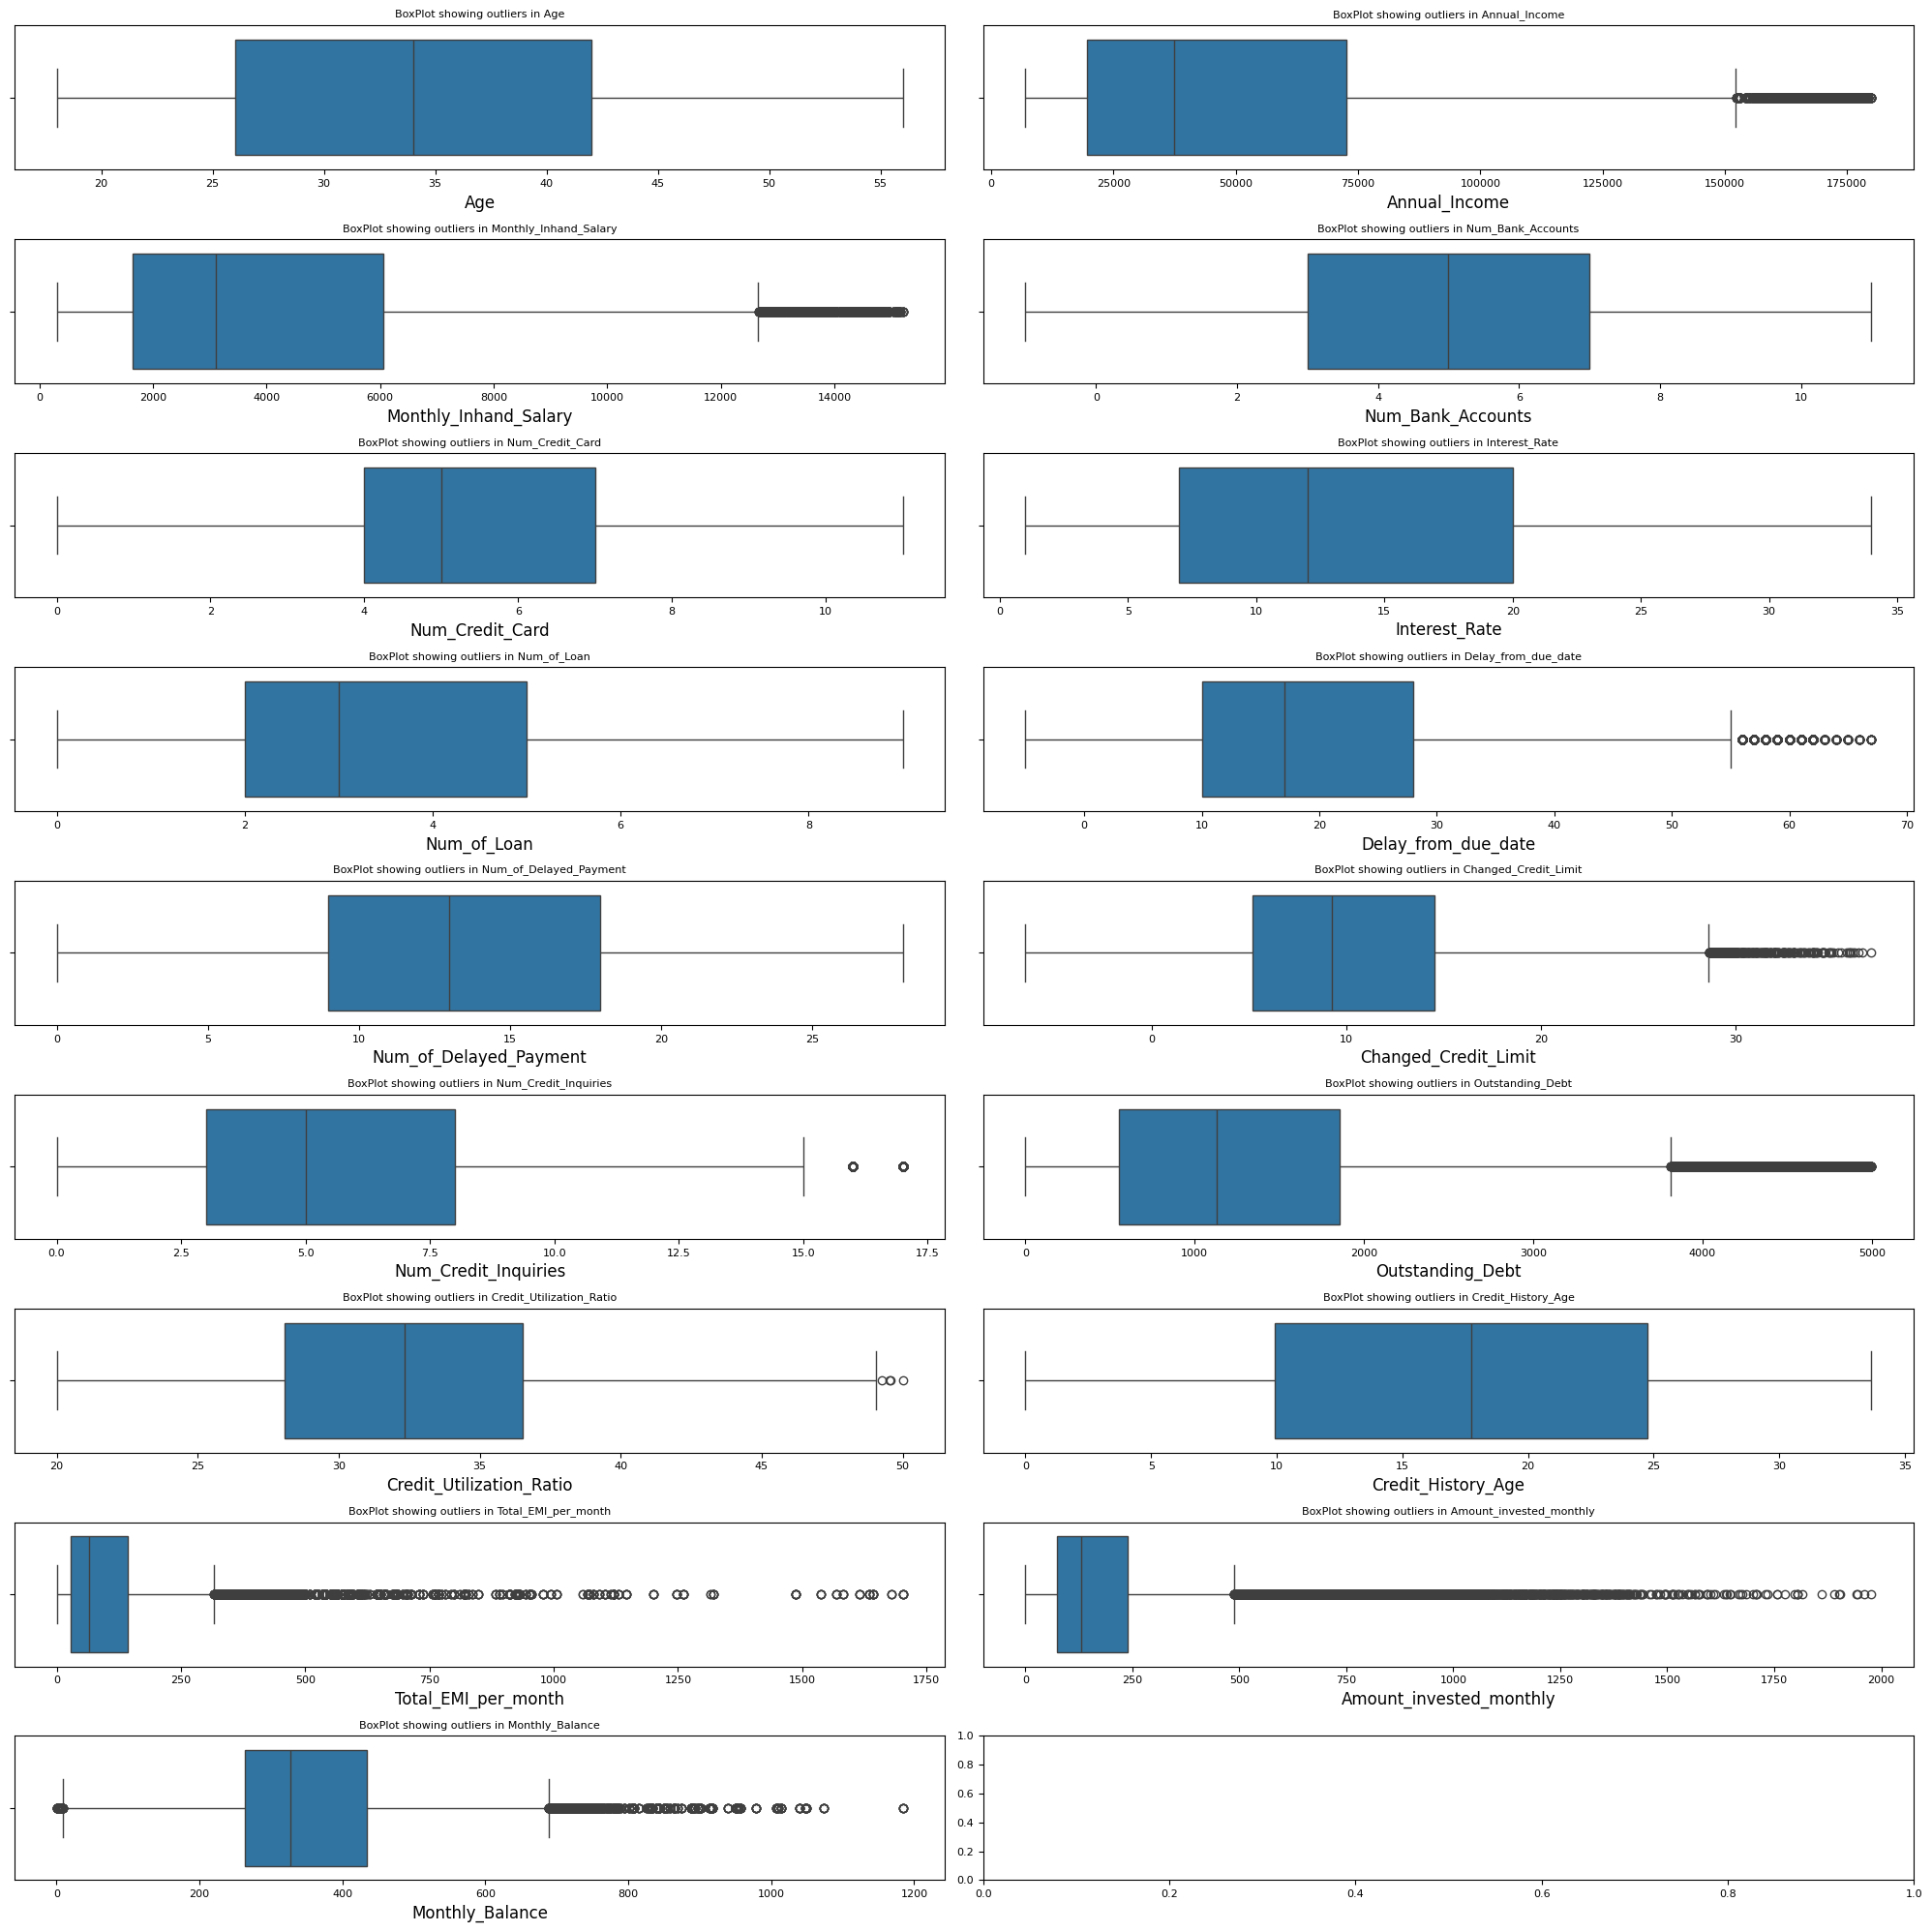

In [ ]:
fig, axes = plt.subplots(9, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x = df[col], ax = axes[i])
    axes[i].set_title(f'BoxPlot showing outliers in {col}')


plt.tight_layout()
plt.savefig("boxplot.png")
plt.show()

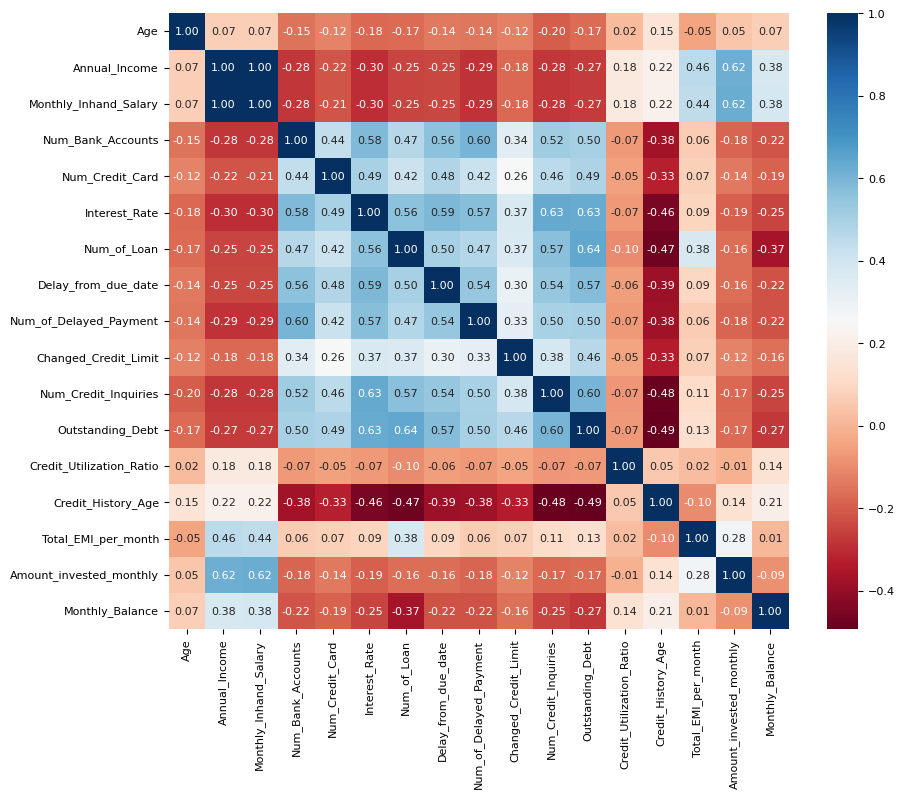

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_col].corr(),annot=True, cmap='RdBu', fmt=".2f");

In [ ]:
df = df.drop(columns=['Annual_Income'])

20 total features to use.
tot nr of records 75521

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69114 entries, 0 to 98302
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       69114 non-null  int64  
 1   Occupation                69114 non-null  object 
 2   Monthly_Inhand_Salary     69114 non-null  float64
 3   Num_Bank_Accounts         69114 non-null  int64  
 4   Num_Credit_Card           69114 non-null  int64  
 5   Interest_Rate             69114 non-null  int64  
 6   Num_of_Loan               69114 non-null  int64  
 7   Delay_from_due_date       69114 non-null  int64  
 8   Num_of_Delayed_Payment    69114 non-null  float64
 9   Changed_Credit_Limit      69114 non-null  float64
 10  Num_Credit_Inquiries      69114 non-null  float64
 11  Credit_Mix                69114 non-null  object 
 12  Outstanding_Debt          69114 non-null  float64
 13  Credit_Utilization_Ratio  69114 non-null  float64
 14  Credit_Hist

In [ ]:
columns_to_check = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

for col in columns_to_check:
    distinct_vals = df[col].nunique()
    print(f'{distinct_vals} unique values in {col} column:\n{df[col].unique()}\n{"-"*50}')

15 unique values in Occupation column:
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
--------------------------------------------------
3 unique values in Credit_Mix column:
['Good' 'Standard' 'Bad']
--------------------------------------------------
2 unique values in Payment_of_Min_Amount column:
['No' 'Yes']
--------------------------------------------------
6 unique values in Payment_Behaviour column:
['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Large_value_payments']
--------------------------------------------------


In [ ]:
df

,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,1824.843333,3,4,3,4,3,7.0,11.27,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,23,Scientist,1824.843333,3,4,3,4,5,4.0,6.27,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
6,23,Scientist,1824.843333,3,4,3,4,3,8.0,11.27,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23,Scientist,1824.843333,3,4,3,4,3,6.0,11.27,...,Good,809.98,23.933795,0.000000,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,28,Teacher,3037.986667,2,4,6,1,3,4.0,5.42,...,Good,605.03,24.464031,26.583333,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98297,38,Lawyer,3152.962500,0,4,4,1,4,3.0,1.58,...,Good,599.40,38.442034,0.000000,No,25.671257,218.360354,High_spent_Small_value_payments,331.264639,Standard
98299,38,Lawyer,3152.962500,0,4,4,1,9,1.0,1.58,...,Good,599.40,31.936092,25.166667,No,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,Standard
98300,38,Lawyer,3152.962500,0,4,4,1,9,1.0,1.58,...,Good,599.40,26.268474,25.250000,No,25.671257,76.057218,High_spent_Large_value_payments,453.567775,Standard
98301,38,Lawyer,3152.962500,0,4,4,1,9,1.0,1.58,...,Good,599.40,28.754729,0.000000,No,25.671257,91.198586,High_spent_Medium_value_payments,448.426407,Standard


<ipython-input-46-c7071459e627>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Occupation', y='Count', data=occupation_counts, palette='mako')


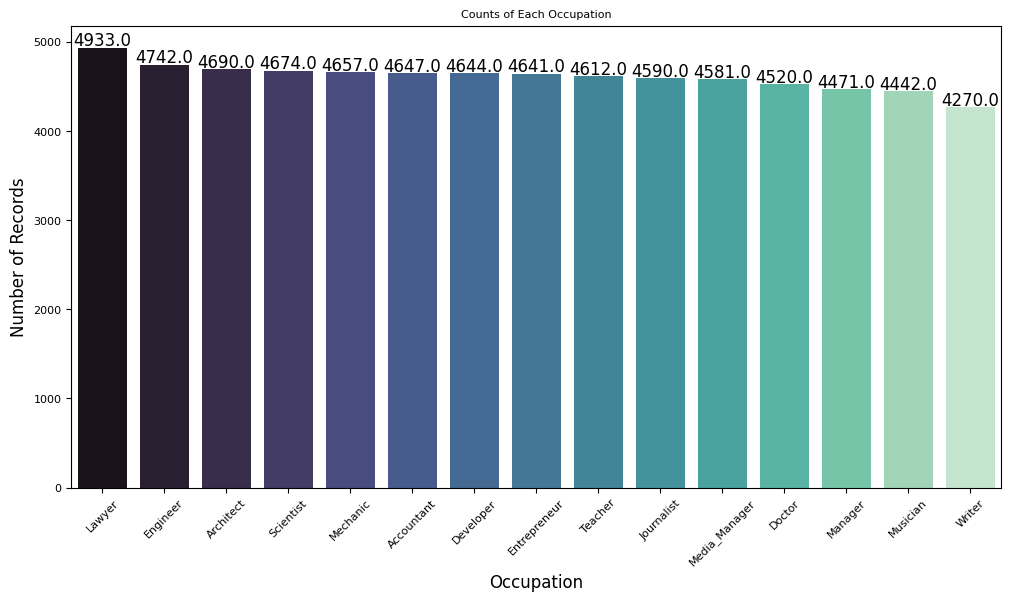

In [ ]:
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Occupation', y='Count', data=occupation_counts, palette='mako')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('Occupation')
plt.ylabel('Number of Records')
plt.title('Counts of Each Occupation')
plt.xticks(rotation=45)
plt.show()

Preparation of dataset for usage

In [ ]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(include="object").columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69114 entries, 0 to 98302
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       69114 non-null  int64  
 1   Occupation                69114 non-null  object 
 2   Monthly_Inhand_Salary     69114 non-null  float64
 3   Num_Bank_Accounts         69114 non-null  int64  
 4   Num_Credit_Card           69114 non-null  int64  
 5   Interest_Rate             69114 non-null  int64  
 6   Num_of_Loan               69114 non-null  int64  
 7   Delay_from_due_date       69114 non-null  int64  
 8   Num_of_Delayed_Payment    69114 non-null  float64
 9   Changed_Credit_Limit      69114 non-null  float64
 10  Num_Credit_Inquiries      69114 non-null  float64
 11  Credit_Mix                69114 non-null  object 
 12  Outstanding_Debt          69114 non-null  float64
 13  Credit_Utilization_Ratio  69114 non-null  float64
 14  Credit_Hist

In [ ]:
df_one_hot = pd.get_dummies(df, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour'], prefix=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour'])
df_one_hot

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,1824.843333,3,4,3,4,3,7.0,11.27,4.0,...,True,False,True,False,False,False,True,False,False,False
3,23,1824.843333,3,4,3,4,5,4.0,6.27,4.0,...,True,False,True,False,False,False,False,False,False,True
6,23,1824.843333,3,4,3,4,3,8.0,11.27,4.0,...,True,False,True,False,False,False,False,False,False,True
7,23,1824.843333,3,4,3,4,3,6.0,11.27,4.0,...,True,False,True,False,False,True,False,False,False,False
8,28,3037.986667,2,4,6,1,3,4.0,5.42,2.0,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98297,38,3152.962500,0,4,4,1,4,3.0,1.58,2.0,...,True,False,True,False,False,False,True,False,False,False
98299,38,3152.962500,0,4,4,1,9,1.0,1.58,2.0,...,True,False,True,False,False,False,False,False,False,True
98300,38,3152.962500,0,4,4,1,9,1.0,1.58,2.0,...,True,False,True,False,True,False,False,False,False,False
98301,38,3152.962500,0,4,4,1,9,1.0,1.58,2.0,...,True,False,True,False,False,True,False,False,False,False


In [ ]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69114 entries, 0 to 98302
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 69114 non-null  int64  
 1   Monthly_Inhand_Salary                               69114 non-null  float64
 2   Num_Bank_Accounts                                   69114 non-null  int64  
 3   Num_Credit_Card                                     69114 non-null  int64  
 4   Interest_Rate                                       69114 non-null  int64  
 5   Num_of_Loan                                         69114 non-null  int64  
 6   Delay_from_due_date                                 69114 non-null  int64  
 7   Num_of_Delayed_Payment                              69114 non-null  float64
 8   Changed_Credit_Limit                                69114 non-null  float64
 9   

In [ ]:
df

,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,1824.843333,3,4,3,4,3,7.0,11.27,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,23,Scientist,1824.843333,3,4,3,4,5,4.0,6.27,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
6,23,Scientist,1824.843333,3,4,3,4,3,8.0,11.27,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23,Scientist,1824.843333,3,4,3,4,3,6.0,11.27,...,Good,809.98,23.933795,0.000000,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,28,Teacher,3037.986667,2,4,6,1,3,4.0,5.42,...,Good,605.03,24.464031,26.583333,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98297,38,Lawyer,3152.962500,0,4,4,1,4,3.0,1.58,...,Good,599.40,38.442034,0.000000,No,25.671257,218.360354,High_spent_Small_value_payments,331.264639,Standard
98299,38,Lawyer,3152.962500,0,4,4,1,9,1.0,1.58,...,Good,599.40,31.936092,25.166667,No,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,Standard
98300,38,Lawyer,3152.962500,0,4,4,1,9,1.0,1.58,...,Good,599.40,26.268474,25.250000,No,25.671257,76.057218,High_spent_Large_value_payments,453.567775,Standard
98301,38,Lawyer,3152.962500,0,4,4,1,9,1.0,1.58,...,Good,599.40,28.754729,0.000000,No,25.671257,91.198586,High_spent_Medium_value_payments,448.426407,Standard


one-hot encoding

log transf

In [ ]:
num_col2 = ['Monthly_Inhand_Salary', 'Total_EMI_per_month', 'Amount_invested_monthly']

#Apply log transformation (adding 1 to avoid log(0))
df_one_hot[num_col2] = df_one_hot[num_col2].apply(lambda x: np.log(x + 1))

print(df_one_hot)

       Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       23               7.509797                  3                4   
3       23               7.509797                  3                4   
6       23               7.509797                  3                4   
7       23               7.509797                  3                4   
8       28               8.019279                  2                4   
...    ...                    ...                ...              ...   
98297   38               8.056415                  0                4   
98299   38               8.056415                  0                4   
98300   38               8.056415                  0                4   
98301   38               8.056415                  0                4   
98302   38               8.056415                  0                4   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  3            4                    3   
3      

In [ ]:
scaler = StandardScaler()
df_one_hot[num_col] = scaler.fit_transform(df_one_hot[num_col])

In [ ]:
df.head(10)

,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,1824.843333,3,4,3,4,3,7.0,11.27,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,23,Scientist,1824.843333,3,4,3,4,5,4.0,6.27,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
6,23,Scientist,1824.843333,3,4,3,4,3,8.0,11.27,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23,Scientist,1824.843333,3,4,3,4,3,6.0,11.27,...,Good,809.98,23.933795,0.000000,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,28,Teacher,3037.986667,2,4,6,1,3,4.0,5.42,...,Good,605.03,24.464031,26.583333,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,28,Teacher,3037.986667,2,4,6,1,7,1.0,7.42,...,Good,605.03,38.550848,26.666667,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
11,28,Teacher,3037.986667,2,4,6,1,3,3.0,5.42,...,Good,605.03,39.182656,26.833333,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,28,Teacher,3037.986667,2,4,6,1,3,1.0,6.42,...,Good,605.03,34.977895,26.916667,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,28,Teacher,3037.986667,2,4,6,1,3,0.0,5.42,...,Good,605.03,33.381010,27.000000,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,28,Teacher,3037.986667,2,4,6,1,3,4.0,5.42,...,Good,605.03,31.131702,27.083333,No,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

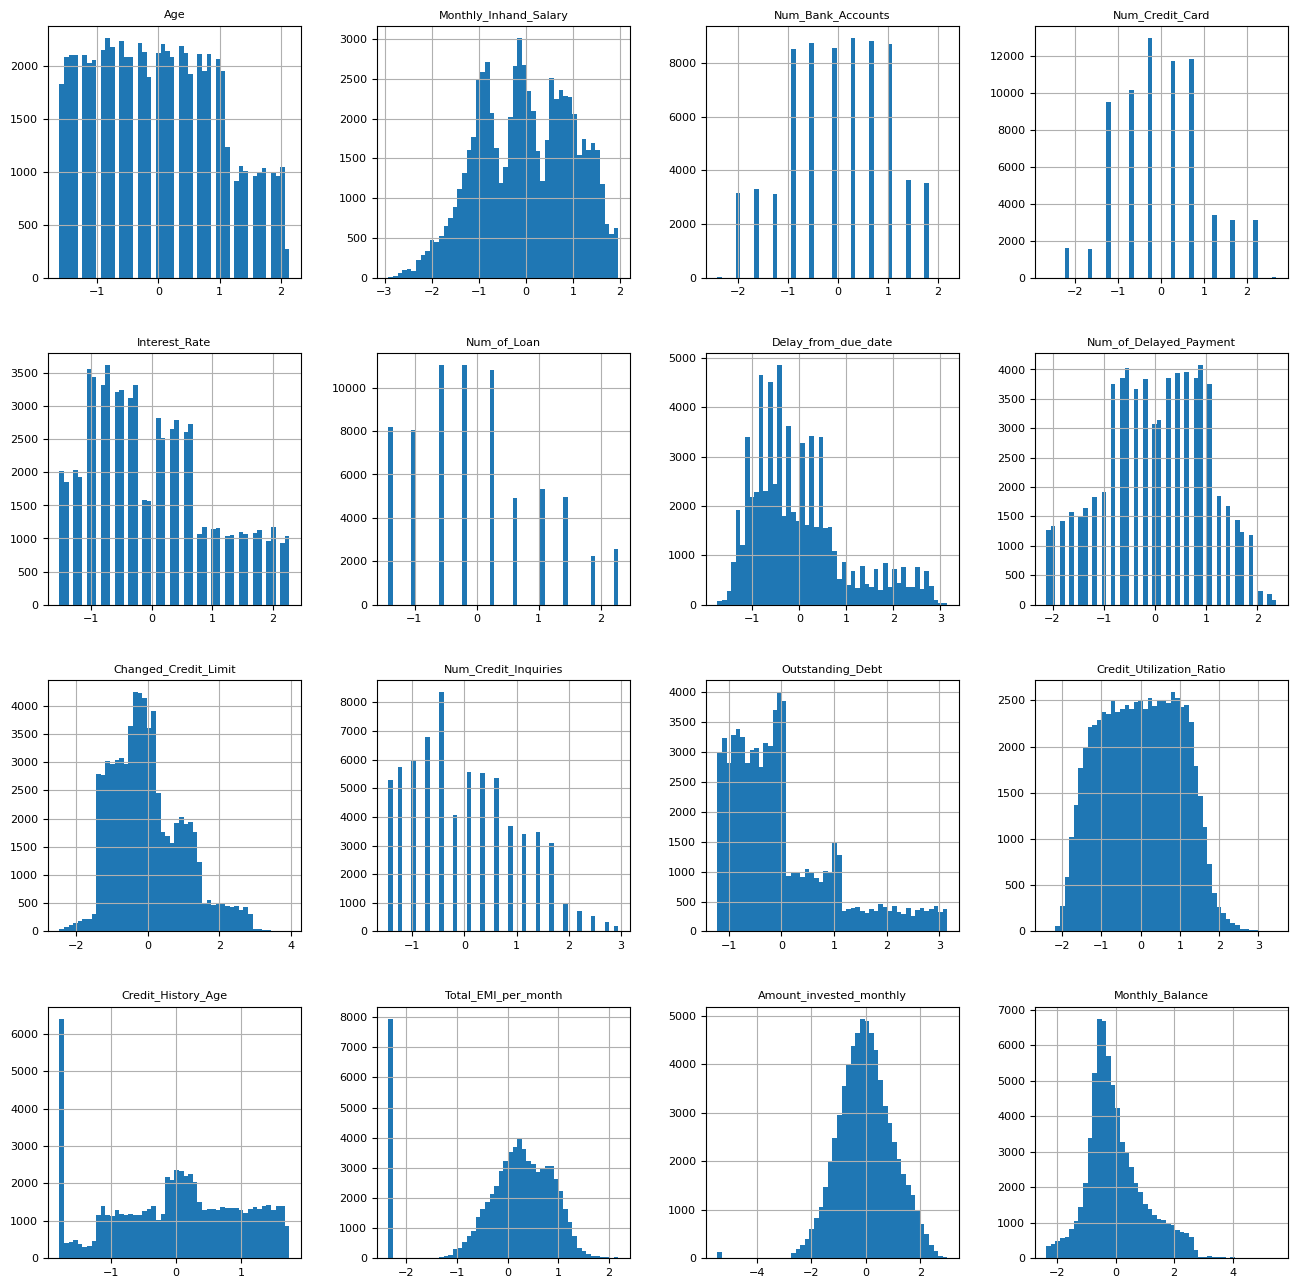

In [ ]:
df_one_hot.hist(bins=50, figsize=(16, 16))


In [ ]:
df_ready = df_one_hot.dropna()

In [ ]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69114 entries, 0 to 98302
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 69114 non-null  float64
 1   Monthly_Inhand_Salary                               69114 non-null  float64
 2   Num_Bank_Accounts                                   69114 non-null  float64
 3   Num_Credit_Card                                     69114 non-null  float64
 4   Interest_Rate                                       69114 non-null  float64
 5   Num_of_Loan                                         69114 non-null  float64
 6   Delay_from_due_date                                 69114 non-null  float64
 7   Num_of_Delayed_Payment                              69114 non-null  float64
 8   Changed_Credit_Limit                                69114 non-null  float64
 9   

splitting dataset and stratifying

In [ ]:

X = df_ready.drop(columns=['Credit_Score'])
y = df_ready['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

KNN

In [ ]:
knn_df = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn_df.fit(X_train, y_train)
knn_predictions = knn_df.predict(X_test)

knn_cv_scores = cross_val_score(knn_df, X_train, y_train, cv=5)


print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

KNN Accuracy: 0.7645228966215727


In [ ]:
knn_cv_results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(len(knn_cv_scores))],
    'Cross-Validation Score': knn_cv_scores
})

knn_cv_results_df

,Fold,Cross-Validation Score
0,Fold 1,0.746270
1,Fold 2,0.744710
2,Fold 3,0.744438
3,Fold 4,0.747604
4,Fold 5,0.745704


In [ ]:
print("Classification Report for KNN:")
print(classification_report(y_test, knn_predictions))

Classification Report for KNN:
              precision    recall  f1-score   support

        Good       0.68      0.74      0.71      2555
        Poor       0.75      0.76      0.76      3890
    Standard       0.81      0.77      0.79      7378

    accuracy                           0.76     13823
   macro avg       0.75      0.76      0.75     13823
weighted avg       0.77      0.76      0.77     13823



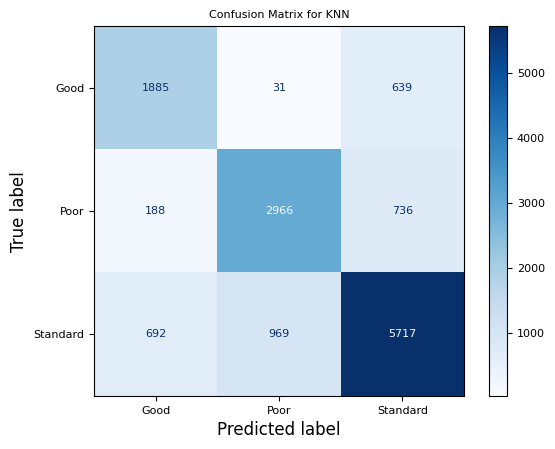

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, model_name):

    cm = confusion_matrix(y_test, knn_predictions)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


plot_confusion_matrix(knn_df, X_test, y_test, "KNN")


Decision tree

In [ ]:
dt_df = DecisionTreeClassifier(random_state=42)
dt_df.fit(X_train, y_train)
dt_predictions = dt_df.predict(X_test)

print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

        Good       0.64      0.63      0.63      2555
        Poor       0.69      0.69      0.69      3890
    Standard       0.73      0.73      0.73      7378

    accuracy                           0.70     13823
   macro avg       0.69      0.68      0.69     13823
weighted avg       0.70      0.70      0.70     13823



In [ ]:
dt_cv_scores = cross_val_score(dt_df, X_train, y_train, cv=5)
dt_cv_results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(len(dt_cv_scores))],
    'Cross-Validation Score': dt_cv_scores
})

dt_cv_results_df

,Fold,Cross-Validation Score
0,Fold 1,0.709196
1,Fold 2,0.704196
2,Fold 3,0.687737
3,Fold 4,0.709622
4,Fold 5,0.703473


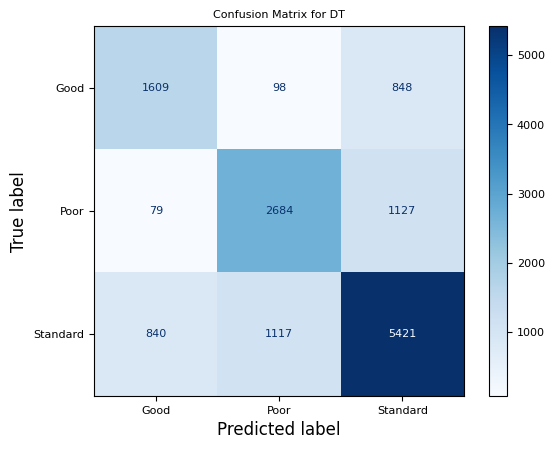

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, model_name):

    cm = confusion_matrix(y_test, dt_predictions)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


plot_confusion_matrix(dt_df, X_test, y_test, "DT")

Random forest

In [ ]:
rf_df = RandomForestClassifier(random_state=42)
rf_df.fit(X_train, y_train)
rf_predictions = rf_df.predict(X_test)
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

Classification Report for Random Forest:
              precision    recall  f1-score   support

        Good       0.77      0.75      0.76      2555
        Poor       0.78      0.81      0.79      3890
    Standard       0.82      0.81      0.81      7378

    accuracy                           0.80     13823
   macro avg       0.79      0.79      0.79     13823
weighted avg       0.80      0.80      0.80     13823



In [ ]:
rf_cv_scores = cross_val_score(rf_df, X_train, y_train, cv=5)
rf_cv_results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(len(rf_cv_scores))],
    'Cross-Validation Score': rf_cv_scores
})

rf_cv_results_df

,Fold,Cross-Validation Score
0,Fold 1,0.794918
1,Fold 2,0.792910
2,Fold 3,0.781787
3,Fold 4,0.797884
4,Fold 5,0.793001


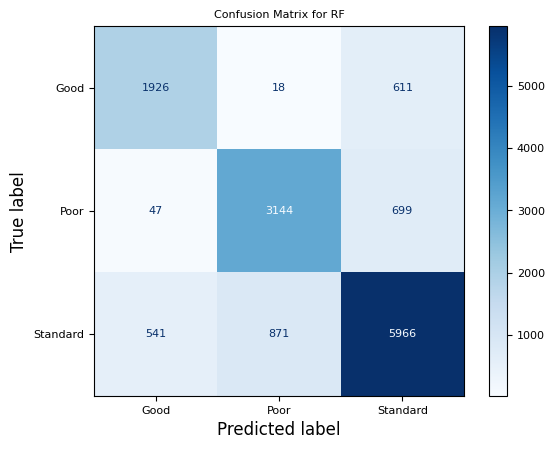

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, model_name):

    cm = confusion_matrix(y_test, rf_predictions)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

plot_confusion_matrix(rf_df, X_test, y_test, "RF")

In [89]:
feature_names = X.columns
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_df.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance.head(10)

print(top_10_features)

                     Feature  Importance
10          Outstanding_Debt    0.098309
4              Interest_Rate    0.075851
6        Delay_from_due_date    0.057708
8       Changed_Credit_Limit    0.057446
12        Credit_History_Age    0.055105
14   Amount_invested_monthly    0.048629
15           Monthly_Balance    0.046800
11  Credit_Utilization_Ratio    0.046640
1      Monthly_Inhand_Salary    0.045253
33       Credit_Mix_Standard    0.044537


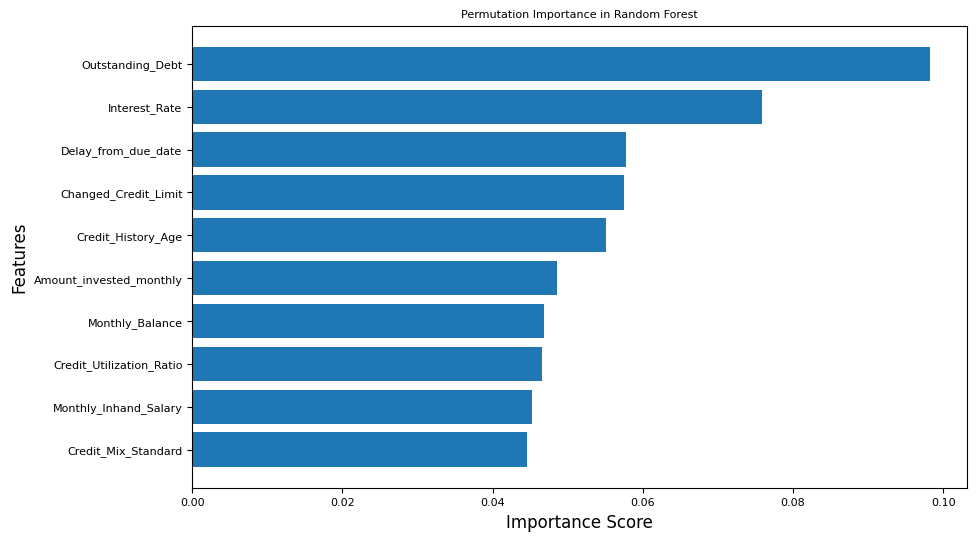

In [90]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Permutation Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()